# Fantasy Premier League

## Transfers

Every gameweek, managers are allowed to transfer players in and out of their team if their prices respect the budget. Every gameweek, one transfer can be made freely and then any additional transfer yields a penalty of 4 FPL points. However, not using this free transfer means that the following week, the manager can used two free transfers (this buffer has a limit of 2).

In this notebook, we will study the patterns that appear in the transfer strategy of top managers from the 2020-2021 FPL Season.

In [1]:
import pandas as pd
import numpy as np

# Get fixtures
fixtures = pd.read_csv("../data/fpl_official/vaastav/data/2020-21/fixtures.csv")[['event', 'team_a', 'team_h']]

gw_type = {}
for gw in range(1, 39):
    if fixtures[fixtures['event'] == gw].shape[0] < 10:
        gw_type[gw] = 'BGW'
    elif fixtures[fixtures['event'] == gw].shape[0] > 10:
        gw_type[gw] = 'DGW'
    else :
        # Handle dgw for some & bgw for others
        playing_teams = (
            list(fixtures[fixtures['event'] == 1]['team_a'].values) +
            list(fixtures[fixtures['event'] == 1]['team_h'].values)
            )
        if np.all([team_id in playing_teams for team_id in np.arange(1, 20)]):
            gw_type[gw] = 'Mixed'
        else:
            gw_type[gw] = 'Regular'

### Free Transfers

In [2]:
import glob
import os

path = '../data/fpl_official/20-21/season/processed/'
all_files = (
    glob.glob(os.path.join(path, "free_transfers_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "free_transfers_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "free_transfers_100000.csv"))
)
fts = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
fts = pd.concat(fts)
fts.sort_index(inplace=True)

/tmp/ipykernel_12763/453064136.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_12763/453064136.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/tmp/ipykernel_12763/453064136.py:74: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])
/home/pf/.local/lib/python3.8/site-packages/IPython/core/pylabtools.py:134: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


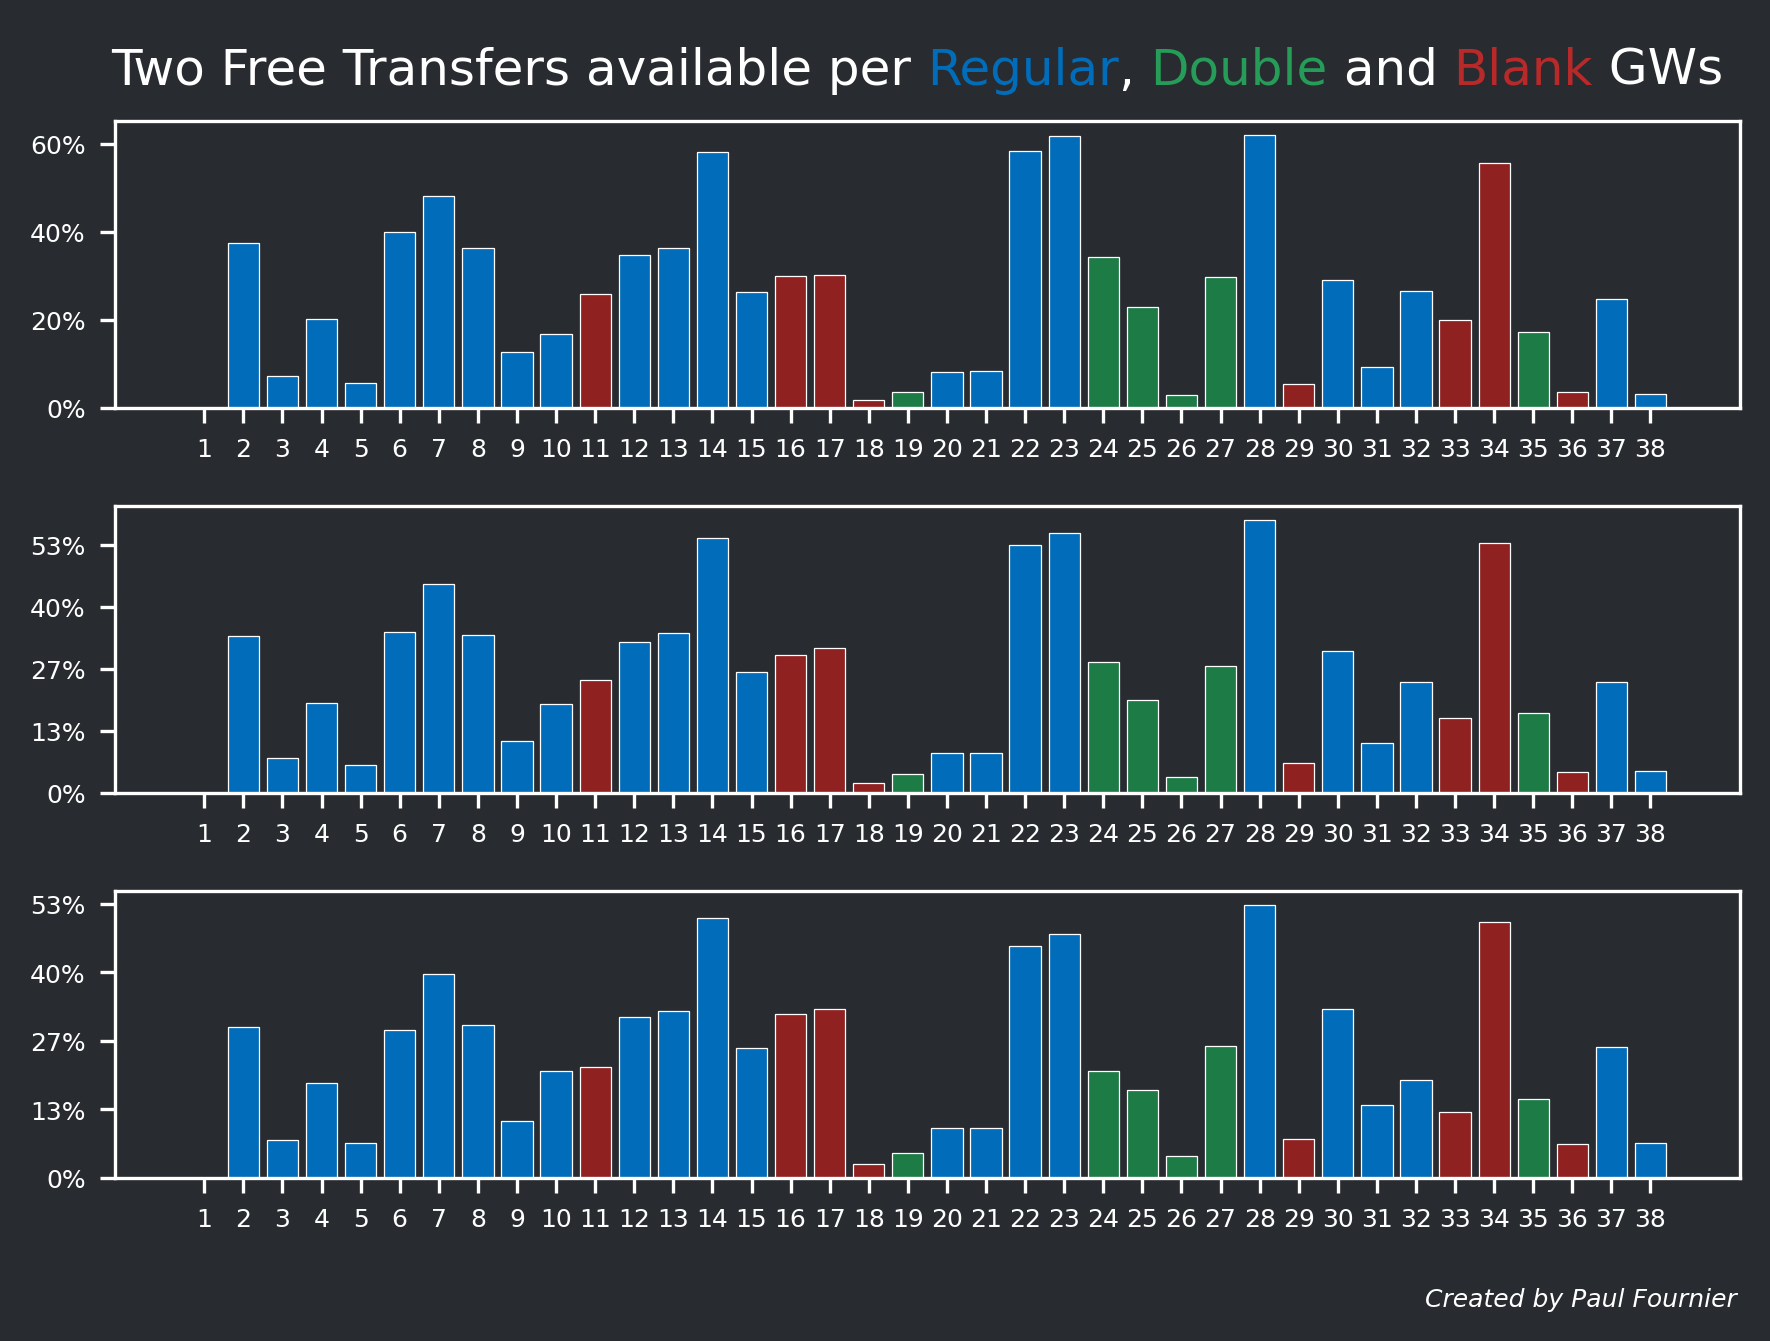

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300
from highlight_text import fig_text

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

fig, axs = plt.subplots(3, 1, tight_layout=True)
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)
axs[2].patch.set_alpha(0)

one, two = [], []
for gw in range(1, 39):
    one.append(sum(fts.loc[:10000, str(gw)] == 1))
    two.append(sum(fts.loc[:10000, str(gw)] == 2))

patches = axs[0].bar(np.arange(1, 39), two, label='One', color='#016DBA', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#902121')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#1D7B46')
        patches[k-1].set_edgecolor('w')
axs[0].set_xticks(np.arange(1, 39), minor=False)
vals = axs[0].get_yticks() / 10000
axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

one, two = [], []
for gw in range(1, 39):
    one.append(sum(fts.loc[10000:25000, str(gw)] == 1))
    two.append(sum(fts.loc[10000:25000, str(gw)] == 2))

patches = axs[1].bar(np.arange(1, 39), two, label='One', color='#016DBA', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#902121')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#1D7B46')
        patches[k-1].set_edgecolor('w')
axs[1].set_xticks(np.arange(1, 39), minor=False)
vals = axs[1].get_yticks() / 15000
axs[1].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

one, two = [], []
for gw in range(1, 39):
    one.append(sum(fts.loc[25000:100000, str(gw)] == 1))
    two.append(sum(fts.loc[25000:100000, str(gw)] == 2))

patches = axs[2].bar(np.arange(1, 39), two, label='One', color='#016DBA', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#902121')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#1D7B46')
        patches[k-1].set_edgecolor('w')
axs[2].set_xticks(np.arange(1, 39), minor=False)
vals = axs[2].get_yticks() / 75000
axs[2].set_yticklabels(['{:,.0%}'.format(x) for x in vals])

fig_text(x=0.07, y=1.025,
        s="Rolled Free Transfers per <Regular>, <Double> and <Blank> GWs",
        highlight_textprops=[
            {"color": '#016DBA'},
            {"color": '#259C58'},
            {"color": '#B82A2A'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font,
        color=text_color, alpha=1)

fig.text(
    0.8, -0.025, "Created by Paul Fournier", fontstyle="italic",
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()

One very interesting thing to note is that very skilled managers seem to keep their transfers more than other managers. All the distributions have the same shape: the managers seem to keep their transfers ahead of Bonus gameweeks.

### Hit Points

In [4]:
path = '../data/fpl_official/20-21/season/processed/'
all_files = (
    glob.glob(os.path.join(path, "hit_points_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "hit_points_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "hit_points_100000.csv"))
)
hits = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
hits = pd.concat(hits)
hits.sort_index(inplace=True)

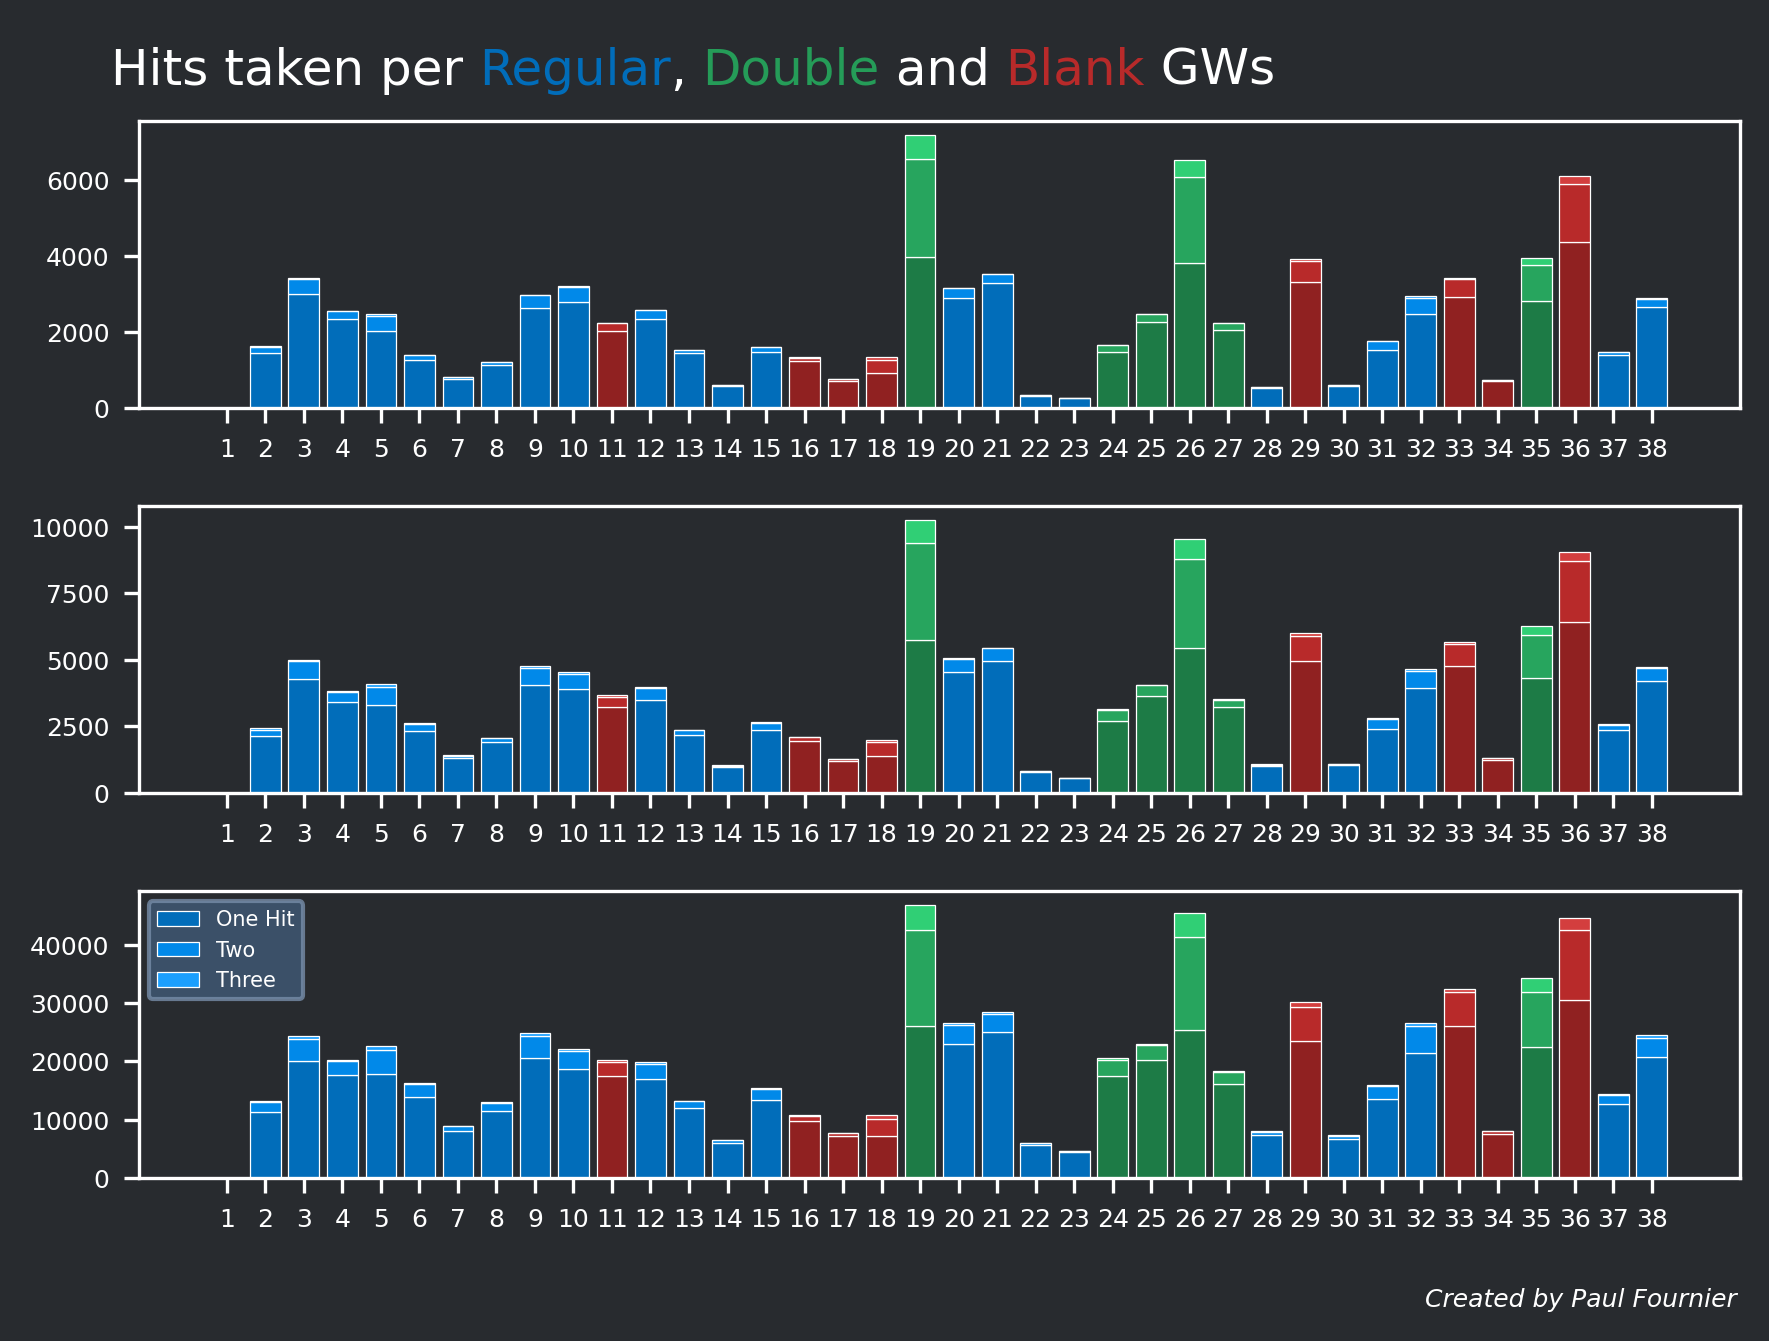

In [37]:
fig, axs = plt.subplots(3, 1, tight_layout=True)
fig.set_facecolor(background)
axs[0].patch.set_alpha(0)
axs[1].patch.set_alpha(0)
axs[2].patch.set_alpha(0)

one, two, three, four = [], [], [], []
for gw in range(1, 39):
    one.append(sum(hits.loc[:10000, str(gw)] == -1))
    two.append(sum(hits.loc[:10000, str(gw)] == -2))
    three.append(sum(hits.loc[:10000, str(gw)] == -3))
    four.append(sum(hits.loc[:10000, str(gw)] == -4))

patches = axs[0].bar(np.arange(1, 39), one, color='#016DBA', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#902121')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#1D7B46')
        patches[k-1].set_edgecolor('w')
        bottom_y = np.array(one)

patches = axs[0].bar(np.arange(1, 39), two, bottom=bottom_y, color='#0189E9', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#B82A2A')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#27A55E')
        patches[k-1].set_edgecolor('w')

bottom_y += np.array(two)
patches = axs[0].bar(np.arange(1, 39), three, bottom=bottom_y, color='#1B9FFE', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#D33E3E')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#30CF75')
        patches[k-1].set_edgecolor('w')
axs[0].set_xticks(np.arange(1, 39), minor=False)

one, two, three, four = [], [], [], []
for gw in range(1, 39):
    one.append(sum(hits.loc[10000:25000, str(gw)] == -1))
    two.append(sum(hits.loc[10000:25000, str(gw)] == -2))
    three.append(sum(hits.loc[10000:25000, str(gw)] == -3))
    four.append(sum(hits.loc[10000:25000, str(gw)] == -4))

patches = axs[1].bar(np.arange(1, 39), one, color='#016DBA', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#902121')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#1D7B46')
        patches[k-1].set_edgecolor('w')

bottom_y = np.array(one)
patches = axs[1].bar(np.arange(1, 39), two, bottom=bottom_y, color='#0189E9', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#B82A2A')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#27A55E')
        patches[k-1].set_edgecolor('w')

bottom_y += np.array(two)
patches = axs[1].bar(np.arange(1, 39), three, bottom=bottom_y, color='#1B9FFE', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if v == 'BGW':
        patches[k-1].set_color('#D33E3E')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#30CF75')
        patches[k-1].set_edgecolor('w')
axs[1].set_xticks(np.arange(1, 39), minor=False)

one, two, three, four = [], [], [], []
for gw in range(1, 39):
    one.append(sum(hits.loc[25000:100000, str(gw)] == -1))
    two.append(sum(hits.loc[25000:100000, str(gw)] == -2))
    three.append(sum(hits.loc[25000:100000, str(gw)] == -3))
    four.append(sum(hits.loc[25000:100000, str(gw)] == -4))

patches = axs[2].bar(np.arange(1, 39), one, color='#016DBA', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if k == 1: # Skip for legend color
        continue
    if v == 'BGW':
        patches[k-1].set_color('#902121')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#1D7B46')
        patches[k-1].set_edgecolor('w')

bottom_y = np.array(one)
patches = axs[2].bar(np.arange(1, 39), two, bottom=bottom_y, color='#0189E9', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if k == 1: # Skip for legend color
        continue
    if v == 'BGW':
        patches[k-1].set_color('#B82A2A')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#27A55E')
        patches[k-1].set_edgecolor('w')

bottom_y += np.array(two)
patches = axs[2].bar(np.arange(1, 39), three, bottom=bottom_y, color='#1B9FFE', edgecolor='w', linewidth=0.3, alpha=1)
for k, v in gw_type.items():
    if k == 1: # Skip for legend color
        continue
    if v == 'BGW':
        patches[k-1].set_color('#D33E3E')
        patches[k-1].set_edgecolor('w')
    elif v == 'DGW':
        patches[k-1].set_color('#30CF75')
        patches[k-1].set_edgecolor('w')
axs[2].set_xticks(np.arange(1, 39), minor=False)

legend = axs[2].legend(prop={'size': 5}, labels=['One Hit', 'Two', 'Three'], frameon = 1)
frame = legend.get_frame()
frame.set_facecolor('#415A77')
frame.set_edgecolor('#778DA9')

fig_text(x=0.07, y=1.025,
        s="Hits taken per <Regular>, <Double> and <Blank> GWs",
        highlight_textprops=[
            {"color": '#016DBA'},
            {"color": '#259C58'},
            {"color": '#B82A2A'},
            ],
        fontweight="regular", fontsize=12, fontfamily=title_font,
        color=text_color, alpha=1)

fig.text(
    0.8, -0.025, "Created by Paul Fournier", fontstyle="italic",
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.tight_layout()
plt.show()

If we look at the first 10 game of the season, managers are willing to take hits. That part of the season where the data sample on players is the lowest, managers must be able to adapt their transfer strategy according to the new patterns that emerge. In general, the Bonus Gameweeks are the ones with the highest number of hits, which makes sense since they are the gameweeks where major Returns on Investments can be made.

### Transfer Position

In [6]:
path = '../data/fpl_official/20-21/season/processed/'
all_files = (
    glob.glob(os.path.join(path, "transfer_position_[0-9][0-9][0-9][0-9].csv")) +
    glob.glob(os.path.join(path, "transfer_position_[0-9][0-9][0-9][0-9][0-9].csv")) + 
    glob.glob(os.path.join(path, "transfer_position_100000.csv"))
)
transfer_pos = (
    pd.read_csv(f, index_col=0)
    for f in all_files)
transfer_pos = pd.concat(transfer_pos)
transfer_pos.sort_index(inplace=True)

In [7]:
transfer_gk_mult = pd.DataFrame().reindex_like(transfer_pos).fillna(0)
transfer_def_mult = pd.DataFrame().reindex_like(transfer_pos).fillna(0)
transfer_mid_mult = pd.DataFrame().reindex_like(transfer_pos).fillna(0)
transfer_fwd_mult = pd.DataFrame().reindex_like(transfer_pos).fillna(0)

def get_multiple_transfers(gw):
    for gw_idx in range(1, 39):
        trans = str(transfer_pos.loc[int(gw.name), str(gw_idx)])
        for tr in trans:
            if int(tr) == 4:
                gw[str(gw_idx)] += 1
    return gw
transfer_gk_mult = transfer_gk_mult.apply(
    lambda row: get_multiple_transfers(row),
    axis=1)

def get_multiple_transfers(gw):
    for gw_idx in range(1, 39):
        trans = str(transfer_pos.loc[int(gw.name), str(gw_idx)])
        for tr in trans:
            if int(tr) == 1:
                gw[str(gw_idx)] += 1
    return gw
transfer_def_mult = transfer_def_mult.apply(
    lambda row: get_multiple_transfers(row),
    axis=1)

def get_multiple_transfers(gw):
    for gw_idx in range(1, 39):
        trans = str(transfer_pos.loc[int(gw.name), str(gw_idx)])
        for tr in trans:
            if int(tr) == 2:
                gw[str(gw_idx)] += 1
    return gw
transfer_mid_mult = transfer_mid_mult.apply(
    lambda row: get_multiple_transfers(row),
    axis=1)

def get_multiple_transfers(gw):
    for gw_idx in range(1, 39):
        trans = str(transfer_pos.loc[int(gw.name), str(gw_idx)])
        for tr in trans:
            if int(tr) == 3:
                gw[str(gw_idx)] += 1
    return gw
transfer_fwd_mult = transfer_fwd_mult.apply(
    lambda row: get_multiple_transfers(row),
    axis=1)

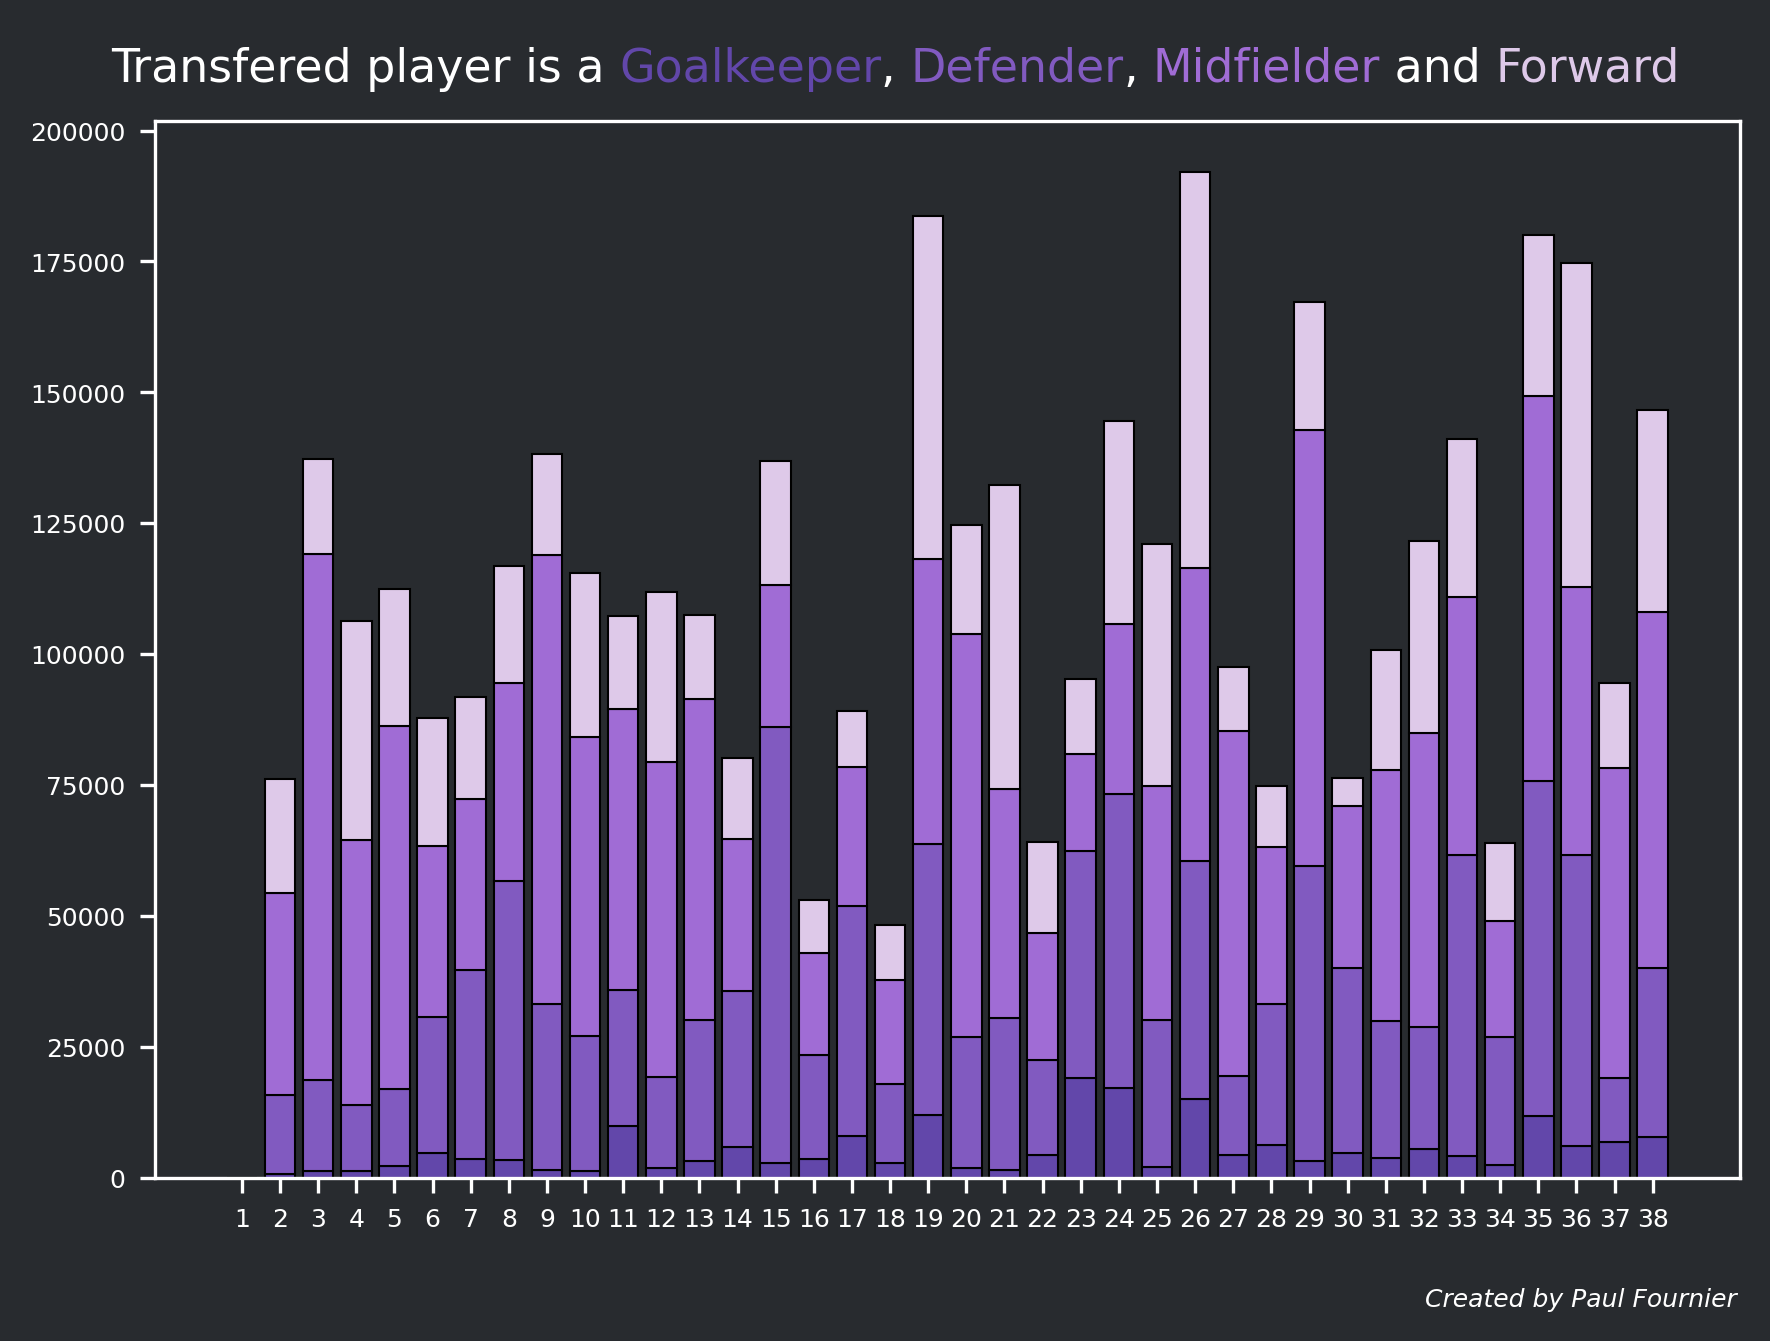

In [8]:
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

fig, ax = plt.subplots(1, 1, tight_layout=True)
fig.set_facecolor(background)
ax.patch.set_alpha(0)

transfer_gk, transfer_def, transfer_mid, transfer_fwd = [], [], [], []

for gw in range(1, 39):
    transfer_gk.append(sum(transfer_gk_mult.loc[:, str(gw)]))
    transfer_def.append(sum(transfer_def_mult.loc[:, str(gw)]))
    transfer_mid.append(sum(transfer_mid_mult.loc[:, str(gw)]))
    transfer_fwd.append(sum(transfer_fwd_mult.loc[:, str(gw)]))

ax.bar(np.arange(1, 39), transfer_gk, color='#6247AA', edgecolor='black', linewidth=0.5)
bottom_y = np.array(transfer_gk)
ax.bar(np.arange(1, 39), transfer_def, bottom=bottom_y, color='#815ac0', edgecolor='black', linewidth=0.5)
bottom_y += np.array(transfer_def)
ax.bar(np.arange(1, 39), transfer_mid, bottom=bottom_y, color='#a06cd5', edgecolor='black', linewidth=0.5)
bottom_y += np.array(transfer_mid)
ax.bar(np.arange(1, 39), transfer_fwd, bottom=bottom_y, color='#dec9e9', edgecolor='black', linewidth=0.5)

ax.set_xticks(np.arange(1, 39), minor=False)

fig_text(x=0.07, y=1.025,
        s="Transfered player is a <Goalkeeper>, <Defender>, <Midfielder> and <Forward>",
        highlight_textprops=[
            {"color": '#6247AA'},
            {"color": '#815ac0'},
            {"color": '#a06cd5'},
            {"color": '#dec9e9'},
            ],
        fontweight="regular", fontsize=11, fontfamily=title_font,
        color=text_color, alpha=1)

fig.text(
    0.8, -0.025, "Created by Paul Fournier",
    fontstyle="italic", fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()

This histogram shows that the majority of transfers are made for midfielders, followed by defenders and forwards. Goalkeepers are the players that are transfered the least.